# Advanced Regression Assignment


<b>Name: </b> Jallepalli Prerna

<b>Date: </b> 06/4/2020

<b>Time: </b> 23:30:00


<h3> Other related Instructions </h3>

-- All files are extracted from the same folder.
There is description of each step written after every code cell.

-- There is mainly <b> 1 Main DataFrames </b> for which is obtained after cleaning the data and which is used for data modelling named <b>lassoreidge_data</b>

-- Question 3 of the subjective question is answered at the end of the notebook.


### Importing the libraries

All the necessary libraries are imported, each library has a following commented line stating the using of the library in this assignment

In [1]:
import pandas as pd
# Pandas library helps in extracting the data from csv or excel files 
# into the dataframe and then further manipulating the data according to the necessary format

import numpy as np
# Numpy library helps in statistical calculation and also ploting the best fit line for each state in the assignment

import seaborn as sns
# Seaborn is another visualization library which can be used to plot various charts like, Bar Chart, Pie Chart etc.

import math
# Math library is used to do some basic mathematical operations like square roots etc.

import matplotlib.pyplot as plt
# Matplotlib is a visualization library which can be used to plot various charts like, Bar Chart, Pie Chart etc.

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

%matplotlib inline
# The above command is a magical command for ploting graphs in jupyter notebook

from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')


## 1. Data Extraction
1 Main Dataframe
Any further manipulation will be done using this data frame.

In [2]:
# Importing all datasets
lassoreidge_data = pd.read_csv("train.csv")

In [3]:
# import pandas_profiling
# #Importing the pandas profiling for performing the basic EDA of the data

# report = pandas_profiling.ProfileReport(lassoreidge_data)
# #Store the report into the variable report

# report.to_file("Quick_EDA.html")

## 2. Data Cleaning

Let's now conduct some data cleaning steps. 

We've seen that there are no missing values in the dataset. We've also seen that variables are in the correct format, except ```symboling```, which should rather be a categorical variable (so that dummy variable are created for the categories).

Note that it *can* be used in the model as a numeric variable also. 



### Treatment of Null Values and Unnecessary columns

In [4]:
# Calculating the percentage of Null values in each column
total = pd.DataFrame(lassoreidge_data.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(lassoreidge_data.isnull().sum()/lassoreidge_data.shape[0]),2).sort_values(ascending=False),columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


There are total of 19 variables having missing vales and needs to be treated, either by deleting the columns or by imputing the values with some meaningful values.

- <b>PoolQC</b>: - Removed becuase 99% missing values and even if it is meaningful it would be skewed

- <b>MiscFeature</b>: Removed becuase 96% missing values and even if it is meaningful it would be skewed

- <b>Alley</b>: Removed becuase 93% missing values and even if it is meaningful it would be skewed

- <b>Fence</b>: Removed becuase 80% missing values and even if it is meaningful it would be skewed

- <b>FireplaceQu</b>: Removed because 48% missing values and even if it is meaningful it would be skewed

- <b>LotFrontage</b>: Imputed with median value

- <b>GarageCond</b>: Label Encoding but used Replace method and defined the levels, 0 being poor and 5 being excellent

- <b>GarageType</b>: Filled the missing values with "No_Garage" and then did One hot encoding

- <b>GarageYrBlt</b>: Deleted the column as it was not possible to impute the year column and there were 81 missing values hence could not delete the rows as well

- <b>GarageFinish</b>: Label Encoding but used Replace method and defined the levels

- <b>GarageQual</b>: Label Encoding but used Replace method and defined the levels, 0 being poor and 5 being excellent

- <b>BsmtExposure</b>: Label Encoding but used Replace method and defined the levels

- <b>BsmtFinType2</b>: Label Encoding but used Replace method and defined the levels

- <b>BsmtFinType1</b>: Label Encoding but used Replace method and defined the levels

- <b>BsmtCond</b>: Label Encoding but used Replace method and defined the levels

- <b>BsmtQual</b>: Label Encoding but used Replace method and defined the levels

- <b>MasVnrArea</b>: Imputed with Median

- <b>MasVnrType</b>: Droped the rows as there were only 8 missing values in the column

- <b>Electrical</b>: Droped the rows as there was only 1 missing value in the column


In [5]:
lassoreidge_data.shape

(1460, 81)

In [6]:
# Dropping columns having highly skewed data, columns are: PoolQC, MiscFeature, Alley, Fence
# Although the missing data is meaningful but still have to delete because of skewness issue
lassoreidge_data = lassoreidge_data.drop(["PoolQC", "MiscFeature", "Alley", "Fence", "GarageYrBlt", "FireplaceQu"], axis = 1) 
lassoreidge_data["LotFrontage"] = lassoreidge_data["LotFrontage"].fillna(lassoreidge_data["LotFrontage"].median())

#dropping Id column
lassoreidge_data = lassoreidge_data.drop("Id", axis=1)

In [7]:
lassoreidge_data["GarageCond"].replace({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}, inplace=True)
lassoreidge_data["GarageCond"] = lassoreidge_data["GarageCond"].fillna(0)

In [8]:
# Treating all the above columns identified as missing value columns
# df["column1"].replace({"a": "x", "b": "y"}, inplace=True)

lassoreidge_data["GarageType"] = lassoreidge_data["GarageType"].fillna("No_Gar")

lassoreidge_data["GarageFinish"].replace({"Fin": 3, "RFn": 2, "Unf": 1}, inplace=True)
lassoreidge_data["GarageFinish"] = lassoreidge_data["GarageFinish"].fillna(0)

lassoreidge_data["GarageQual"].replace({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}, inplace=True)
lassoreidge_data["GarageQual"] = lassoreidge_data["GarageQual"].fillna(0)

lassoreidge_data["BsmtExposure"].replace({"No": 1, "Mn": 2, "Av": 3, "Gd": 4}, inplace=True)
lassoreidge_data["BsmtExposure"] = lassoreidge_data["BsmtExposure"].fillna(0)

lassoreidge_data["BsmtFinType2"].replace({"Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}, inplace=True)
lassoreidge_data["BsmtFinType2"] = lassoreidge_data["BsmtFinType2"].fillna(0)

lassoreidge_data["BsmtFinType1"].replace({"Unf": 1, "LwQ": 2, "Rec": 3, "BLQ": 4, "ALQ": 5, "GLQ": 6}, inplace=True)
lassoreidge_data["BsmtFinType1"] = lassoreidge_data["BsmtFinType1"].fillna(0)

lassoreidge_data["BsmtCond"].replace({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}, inplace=True)
lassoreidge_data["BsmtCond"] = lassoreidge_data["BsmtCond"].fillna(0)

lassoreidge_data["BsmtQual"].replace({"Po": 1, "Fa": 2, "TA": 3, "Gd": 4, "Ex": 5}, inplace=True)
lassoreidge_data["BsmtQual"] = lassoreidge_data["BsmtQual"].fillna(0)

lassoreidge_data["MasVnrArea"] = lassoreidge_data["MasVnrArea"].fillna(lassoreidge_data["MasVnrArea"].median())

lassoreidge_data = lassoreidge_data.dropna()

In [9]:
### Treating Years column
# YearBuilt, YearRemodAdd, YrSold
lassoreidge_data["no_of_YearBuilt"] = 2020 - lassoreidge_data["YearBuilt"]
lassoreidge_data["no_of_YearRemodAdd"] = 2020 - lassoreidge_data["YearRemodAdd"]
lassoreidge_data["no_of_YrSold"] = 2020 - lassoreidge_data["YrSold"]
lassoreidge_data = lassoreidge_data.drop(["YearBuilt", "YearRemodAdd", "YrSold"], axis=1)

In [10]:
lassoreidge_data.shape

(1451, 74)

## 3. Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset the list of all (independent) numeric variables, and then make a **pairwise plot**.

In [11]:
# all numeric (float and int) variables in the dataset
lassoreidge_numeric = lassoreidge_data.select_dtypes(include=['float64', 'int64'])
lassoreidge_numeric.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,no_of_YearBuilt,no_of_YearRemodAdd,no_of_YrSold
0,60,65.0,8450,7,5,196.0,4.0,3,1.0,6.0,706,1.0,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2.0,2,548,3.0,3.0,0,61,0,0,0,0,0,2,208500,17,17,12
1,20,80.0,9600,6,8,0.0,4.0,3,4.0,5.0,978,1.0,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,2.0,2,460,3.0,3.0,298,0,0,0,0,0,0,5,181500,44,44,13
2,60,68.0,11250,7,5,162.0,4.0,3,2.0,6.0,486,1.0,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2.0,2,608,3.0,3.0,0,42,0,0,0,0,0,9,223500,19,18,12
3,70,60.0,9550,7,5,0.0,3.0,4,1.0,5.0,216,1.0,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1.0,3,642,3.0,3.0,0,35,272,0,0,0,0,2,140000,105,50,14
4,60,84.0,14260,8,5,350.0,4.0,3,3.0,6.0,655,1.0,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2.0,3,836,3.0,3.0,192,84,0,0,0,0,0,12,250000,20,20,12


In [12]:
# correlation matrix
cor = lassoreidge_numeric.corr()
cor

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,MasVnrArea,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,SalePrice,no_of_YearBuilt,no_of_YearRemodAdd,no_of_YrSold
MSSubClass,1.000000,-0.355068,-0.138039,0.034799,-0.061147,0.023156,0.051817,-0.014703,0.052570,0.027268,-0.069241,-0.024619,-0.066037,-0.138789,-0.236547,-0.249775,0.307931,0.046463,0.077025,0.004115,-0.002542,0.136051,0.175813,-0.021715,0.286684,0.042300,-0.044127,-0.033272,-0.039167,-0.098027,-0.072878,-0.089813,-0.012652,-0.005200,-0.010437,-0.044009,-0.026316,0.008240,-0.007773,-0.013659,-0.082760,-0.027979,-0.040664,0.021583
LotFrontage,-0.355068,1.000000,0.304694,0.233277,-0.053026,0.179537,0.140609,0.044861,0.159508,0.073760,0.215778,0.018309,0.042811,0.121921,0.363310,0.414725,0.073332,0.037657,0.368035,0.091347,-0.006798,0.179134,0.047830,0.236903,-0.004653,0.320195,0.233830,0.216582,0.268685,0.323181,0.107287,0.102595,0.074495,0.134766,0.010728,0.062188,0.037974,0.181300,-0.000184,0.009784,0.333206,-0.116365,-0.082885,-0.007310
LotArea,-0.138039,0.304694,1.000000,0.106305,-0.002297,0.104141,0.073564,0.030922,0.229759,0.060125,0.213081,0.087068,0.111674,-0.004250,0.258538,0.295977,0.052979,0.004897,0.261152,0.157695,0.048365,0.122526,0.016364,0.117788,-0.024708,0.188012,0.269677,0.125570,0.154761,0.180767,0.079245,0.076019,0.173170,0.086278,-0.023114,0.020568,0.043498,0.077885,0.038221,0.003177,0.264668,-0.015708,-0.015190,0.012969
OverallQual,0.034799,0.233277,0.106305,1.000000,-0.090940,0.411699,0.628616,0.266241,0.295480,0.230425,0.236421,-0.043422,-0.058211,0.309461,0.536836,0.476645,0.299021,-0.030071,0.594431,0.108108,-0.039348,0.552939,0.272338,0.106013,-0.184799,0.430817,0.400090,0.557456,0.600055,0.560502,0.292627,0.287148,0.240728,0.303215,-0.113176,0.030972,0.066271,0.065720,-0.031183,0.068514,0.790085,-0.572129,-0.550499,0.025116
OverallCond,-0.061147,-0.053026,-0.002297,-0.090940,1.000000,-0.128333,-0.164909,0.133974,-0.058290,-0.013447,-0.042292,0.100893,0.039234,-0.137104,-0.167932,-0.139260,0.027720,0.025099,-0.076631,-0.051877,0.117217,-0.190170,-0.061030,0.014334,-0.081338,-0.055864,-0.020470,-0.169081,-0.184777,-0.151204,0.020120,0.017772,-0.004514,-0.031432,0.074612,0.025123,0.053925,-0.002254,0.068617,-0.004210,-0.076361,0.376557,-0.075545,-0.043487
MasVnrArea,0.023156,0.179537,0.104141,0.411699,-0.128333,1.000000,0.280384,0.074513,0.174765,0.186397,0.264469,-0.046022,-0.072443,0.114298,0.363667,0.344255,0.174874,-0.069127,0.390818,0.085017,0.026581,0.277238,0.202058,0.102898,-0.037698,0.280839,0.248800,0.280575,0.364381,0.372990,0.136043,0.134855,0.159754,0.125461,-0.110363,0.018752,0.061367,0.011697,-0.029854,-0.006159,0.477486,-0.316345,-0.180136,0.008147
BsmtQual,0.051817,0.140609,0.073564,0.628616,-0.164909,0.280384,1.000000,0.633208,0.399985,0.377695,0.304592,0.086598,-0.030013,0.258425,0.566604,0.295556,0.141388,-0.055450,0.328633,0.222964,-0.012516,0.372091,0.227247,-0.037825,-0.277601,0.187283,0.232153,0.483637,0.447893,0.404875,0.181679,0.192261,0.253215,0.251205,-0.179927,0.008535,0.035450,0.026716,-0.044174,0.013401,0.584317,-0.601416,-0.513292,0.021157
BsmtCond,-0.014703,0.044861,0.030922,0.266241,0.133974,0.074513,0.633208,1.000000,0.254144,0.299029,0.163862,0.243658,0.082606,0.169078,0.371646,0.050380,0.058362,-0.033449,0.082232,0.155451,0.065386,0.040754,0.132940,0.003412,-0.270103,0.024238,0.102344,0.181949,0.140610,0.139264,0.128420,0.144313,0.123576,0.093549,-0.040940,-0.008931,0.039908,0.008245,-0.023098,0.023840,0.208984,-0.181871,-0.186916,0.058835
BsmtExposure,0.052570,0.159508,0.229759,0.295480,-0.058290,0.174765,0.399985,0.254144,1.000000,0.348648,0.369602,0.126192,0.094435,-0.035

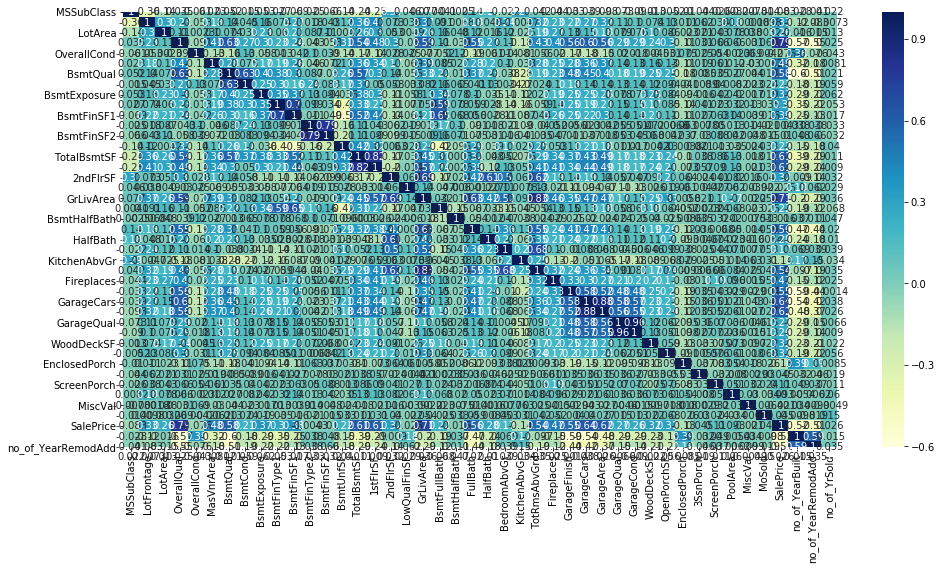

In [13]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(16,8))

# heatmap
sns.heatmap(cor, cmap="YlGnBu", annot=True)
plt.show()


## 4. Data Preparation 


#### Data Preparation

Let's now prepare the data and build the model.

In [14]:
# split into X and y
y = lassoreidge_data['SalePrice']
lassoreidge_data.drop('SalePrice', axis=1)
X = lassoreidge_data

In [15]:
# creating dummy variables for categorical variables

# subset all categorical variables
categoricals = X.select_dtypes(include=['object'])

# convert into dummies
dummies = pd.get_dummies(categoricals, drop_first=True)

# drop categorical variables 
X = X.drop(list(categoricals.columns), axis=1)

# concat dummy variables with X
X = pd.concat([X, dummies], axis=1)

In [16]:
# scaling the features
from sklearn.preprocessing import scale

# storing column names in cols, since column names are (annoyingly) lost after 
# scaling (the df is converted to a numpy array)
cols = X.columns
X = pd.DataFrame(scale(X))
X.columns = cols
X.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       ...
       'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth',
       'SaleType_WD', 'SaleCondition_AdjLand', 'SaleCondition_Alloca',
       'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial'],
      dtype='object', length=212)

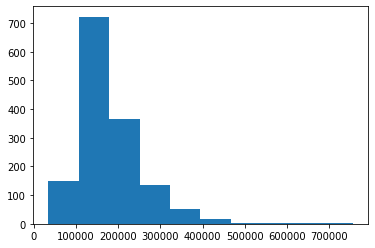

In [17]:
# Target Variable
plt.hist(y)
plt.show()
# We observe that the target variable is skewed hence we apply logorithm on that column

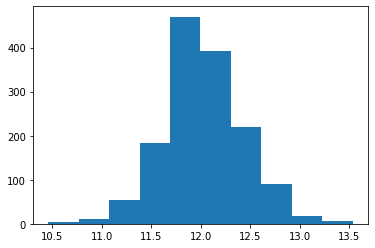

In [18]:
# Taking the logorithm of the 
y = np.log(y)
plt.hist(y)
plt.show()
# Now we observe that the target variable is normally distributed

In [19]:
# split into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

## 5. Model Building and Evaluation

## Ridge and Lasso Regression

Let's now try predicting car prices, a dataset used in simple linear regression, to perform ridge and lasso regression.

## Ridge Regression

In [20]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    2.5s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

In [21]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.010270,0.000070,0.003017,0.000026,0.0001,{'alpha': 0.0001},-0.065635,-0.059398,-0.067815,-0.066912,-0.064710,-0.064894,0.002946,23,-0.039304,-0.042041,-0.040961,-0.041458,-0.039681,-0.040689,0.001042
1,0.010432,0.000213,0.003040,0.000027,0.001,{'alpha': 0.001},-0.065633,-0.059395,-0.067814,-0.066910,-0.064709,-0.064892,0.002946,22,-0.039304,-0.042041,-0.040961,-0.041459,-0.039681,-0.040689,0.001042
2,0.010644,0.000607,0.003583,0.001111,0.01,{'alpha': 0.01},-0.065621,-0.059371,-0.067805,-0.066886,-0.064705,-0.064878,0.002950,21,-0.039304,-0.042040,-0.040962,-0.041461,-0.039682,-0.040690,0.001042
3,0.010440,0.000161,0.003042,0.000058,0.05,{'alpha': 0.05},-0.065569,-0.059272,-0.067762,-0.066781,-0.064687,-0.064814,0.002962,20,-0.039302,-0.042041,-0.040967,-0.041472,-0.039686,-0.040694,0.001044
4,0.010342,0.000086,0.003002,0.000006,0.1,{'alpha': 0.1},-0.065512,-0.059165,-0.067709,-0.066647,-0.064667,-0.064740,0.002971,19,-0.039304,-0.042045,-0.040973,-0.041485,-0.039691,-0.040700,0.001045


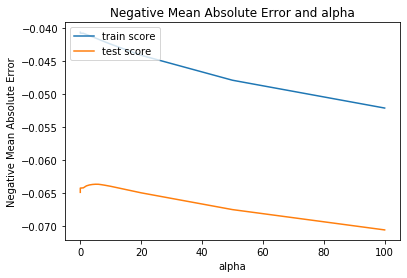

In [22]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

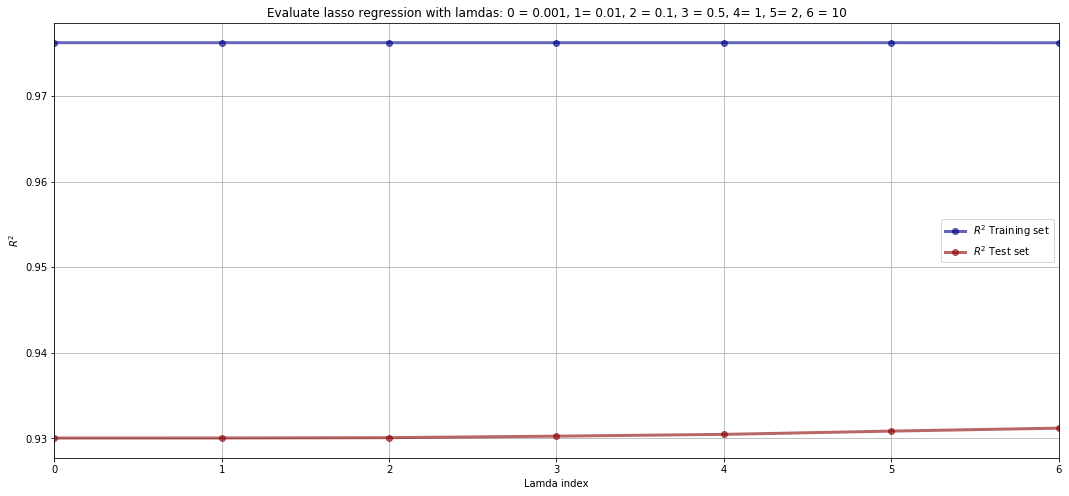

In [23]:
lambdas = (0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
           2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100)
l_num = 26
pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Ridge(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)
    
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()


In [24]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]


R_squared    93.978767
lambda       20.000000
Name: 23, dtype: float64

In [25]:
alpha = 40
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([ 2.89570945e-03,  1.76457497e-03,  8.08601526e-03,  3.50982832e-02,
        2.79343097e-02, -7.14188696e-03,  3.71086871e-03,  1.03540649e-02,
       -1.47795391e-03,  1.29003365e-02, -6.40115502e-04, -4.86706002e-03,
        4.19896697e-03,  3.39693381e-03,  4.31582785e-03,  2.26232265e-02,
        1.14629816e-02,  7.37924447e-03,  2.67648639e-02,  1.33292857e-02,
        2.04551760e-04,  7.98495044e-03,  6.84702622e-03,  1.18959448e-02,
       -4.47891326e-03,  4.47757882e-04,  7.54762826e-03,  5.15515783e-03,
        1.61096292e-02,  7.96987468e-03,  6.72411192e-03, -2.29193776e-03,
        8.81445690e-03,  1.62595105e-03,  9.45264372e-03,  3.11519511e-03,
        1.03956114e-02, -9.60689423e-03, -4.49308641e-03, -2.84576977e-04,
        1.92910230e-01, -1.67131802e-02, -1.08651479e-02,  3.84568570e-03,
        1.76398792e-02,  1.28500529e-02,  3.83154941e-02,  2.58512357e-02,
        2.63406579e-03,  2.36821901e-03, -3.38042445e-03, -3.38730593e-04,
        2.92054370e-03,  

In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, ridge.predict(X_test))

0.00965218749856341

In [27]:
list_ = sorted(list(ridge.coef_))[-6:-1]
predictors_list = []
for i in range(0, len(list(ridge.coef_))):
    if list(ridge.coef_)[i] in list_:
        predictors_list.append(list(X_train)[i])
predictors_list

['OverallQual', 'OverallCond', 'GrLivArea', 'MSZoning_RL', 'RoofMatl_CompShg']

<b>Important Predictor Variables BEFORE Doubling the alpha </b>

['OverallQual', 'MSZoning_RL', 'MSZoning_RM', 'RoofMatl_CompShg', 'RoofMatl_Tar&Grv']


<b>Important Predictor Variables AFTER Doubling the alpha </b>

['OverallQual', 'OverallCond', 'GrLivArea', 'MSZoning_RL', 'RoofMatl_CompShg']

## Lasso

In [28]:
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.4s finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=False, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
             scoring='neg_mean_absolute_error', verbose=1)

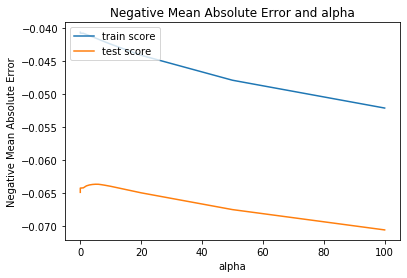

In [29]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')

plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

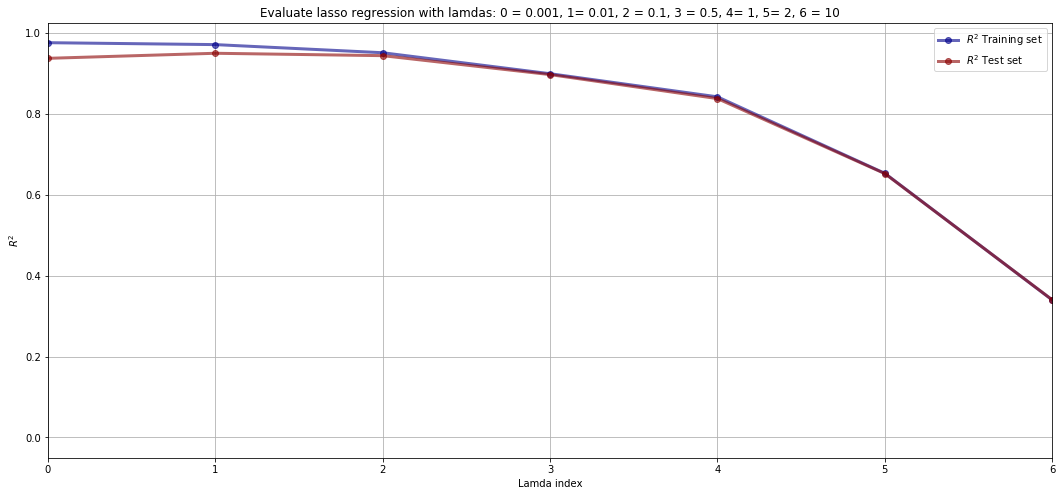

In [30]:
lambdas = (0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
           2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100)
l_num = 26

pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)
    
# Plotting
plt.figure(figsize=(18, 8))
plt.plot(train_r_squared, 'bo-', label=r'$R^2$ Training set', color="darkblue", alpha=0.6, linewidth=3)
plt.plot(test_r_squared, 'bo-', label=r'$R^2$ Test set', color="darkred", alpha=0.6, linewidth=3)
plt.xlabel('Lamda index'); plt.ylabel(r'$R^2$')
plt.xlim(0, 6)
plt.title(r'Evaluate lasso regression with lamdas: 0 = 0.001, 1= 0.01, 2 = 0.1, 3 = 0.5, 4= 1, 5= 2, 6 = 10')
plt.legend(loc='best')
plt.grid()


In [31]:
df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]


R_squared    94.983742
lambda        0.001000
Name: 1, dtype: float64

In [32]:
# Coefficients of best model
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)
lasso.coef_

array([ 3.16203238e-03,  0.00000000e+00,  0.00000000e+00,  2.63130680e-02,
        2.26296607e-02, -8.88930078e-03, -0.00000000e+00,  1.06871592e-02,
       -4.04497580e-03,  6.26483314e-03, -3.51534957e-04, -0.00000000e+00,
        4.18499664e-04,  3.39657262e-03,  0.00000000e+00,  1.01381979e-02,
        0.00000000e+00,  3.61454694e-03,  1.64390413e-02,  9.17892880e-03,
        0.00000000e+00,  4.95480963e-03,  4.69991271e-03,  1.48720902e-02,
        0.00000000e+00, -0.00000000e+00,  5.62269107e-03,  3.31583700e-03,
        8.55761144e-03,  7.43751003e-03,  0.00000000e+00,  0.00000000e+00,
        5.18423197e-03,  3.81179358e-04,  7.77535734e-03,  1.60231251e-03,
        7.31160526e-03, -1.09816504e-02, -0.00000000e+00, -0.00000000e+00,
        2.70011274e-01, -1.68508421e-02, -8.46123264e-03,  2.49253270e-03,
        1.66075057e-02,  1.11787485e-02,  3.80323223e-02,  2.44328846e-02,
       -0.00000000e+00,  6.10523233e-04, -7.18226863e-05, -0.00000000e+00,
        0.00000000e+00,  

In [33]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, lasso.predict(X_test))

0.00790635625989609

In [34]:
list_ = sorted(list(lasso.coef_))[-6:-1]
predictors_list = []
for i in range(0, len(list(lasso.coef_))):
    if list(lasso.coef_)[i] in list_:
        predictors_list.append(list(X_train)[i])
predictors_list

['OverallQual', 'OverallCond', 'MSZoning_RL', 'MSZoning_RM', 'CentralAir_Y']

<b>Important Predictor Variables BEFORE Doubling the alpha </b>

['OverallQual', 'OverallCond', 'MSZoning_RL', 'MSZoning_RM', 'CentralAir_Y']



<b>Important Predictor Variables AFTER Doubling the alpha </b>

['OverallQual', 'OverallCond', 'GrLivArea', 'CentralAir_Y', 'GarageType_Attchd']

### Question 3: Excluding the 5 predictor variables
['OverallQual', 'OverallCond', 'MSZoning_RL', 'MSZoning_RM', 'CentralAir_Y']

In [35]:
# Data Preperation
X = X.drop(['OverallQual', 'OverallCond', 'MSZoning_RL', 'MSZoning_RM', 'CentralAir_Y'], axis=1)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    train_size=0.7,
                                                    test_size = 0.3, random_state=100)

# Model Building
lasso = Lasso()

# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

lambdas = (0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 
           2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100)
l_num = 26

pred_num = X.shape[1]

# prepare data for enumerate
coeff_a = np.zeros((l_num, pred_num))
train_r_squared = np.zeros(l_num)
test_r_squared = np.zeros(l_num)
# enumerate through lambdas with index and i
for ind, i in enumerate(lambdas):    
    reg = Lasso(alpha = i)
    reg.fit(X_train, y_train)

    coeff_a[ind,:] = reg.coef_
    train_r_squared[ind] = reg.score(X_train, y_train)
    test_r_squared[ind] = reg.score(X_test, y_test)


df_lam = pd.DataFrame(test_r_squared*100, columns=['R_squared'])
df_lam['lambda'] = (lambdas)
# returns the index of the row where column has maximum value.
df_lam.loc[df_lam['R_squared'].idxmax()]

# Coefficients of best model
lasso = Lasso(alpha = 0.001)
lasso.fit(X_train, y_train)

list_ = sorted(list(lasso.coef_))[-6:-1]
predictors_list = []
for i in range(0, len(list(lasso.coef_))):
    if list(lasso.coef_)[i] in list_:
        predictors_list.append(list(X_train)[i])
predictors_list

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    3.3s finished


['BsmtCond',
 '1stFlrSF',
 'BedroomAbvGr',
 'GarageType_Attchd',
 'SaleCondition_Normal']

Result: ['BsmtCond', '1stFlrSF', 'BedroomAbvGr', 'GarageType_Attchd', 'SaleCondition_Normal']